In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime,timedelta
import time




In [2]:
df_2010 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2010.csv')
df_2011 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2011.csv')
df_2012 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2012.csv')
df_2013 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2013.csv')
df_2014 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2014.csv')
df_2015 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2015.csv')
df_2016 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2016.csv')
df_2017 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2017.csv')
df_2018 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2018.csv')
df_2019 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2019.csv')
def_rating = pd.read_csv('../data/defensive-rating/tm-defrtg-avg-2009-2019.csv',index_col=0)


In [3]:
df_all = pd.concat([df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019], axis=0)
df_all = df_all.drop(['x', 'y', 'shot_description', 'game_score'], axis=1)

In [4]:
df_all.groupby('date')['shot_made'].count() # shots attempted

date
2009-10-28    12
2009-10-30     9
2009-11-04     6
2009-11-06     5
2009-11-08     8
2009-11-09     8
2009-11-11     7
2009-11-14     9
2009-11-17    10
2009-11-18    10
2009-11-20     9
2009-11-24    12
2009-11-25    16
2009-11-28    15
2009-11-30     5
2009-12-01    14
2009-12-03     8
2009-12-05    12
2009-12-07    14
2009-12-09    13
2009-12-11     9
2009-12-12    10
2009-12-14    13
2009-12-16    11
2009-12-18    17
2009-12-22    15
2009-12-23    13
2009-12-26    10
2009-12-28     4
2009-12-29    10
              ..
2019-03-27    20
2019-03-29    25
2019-03-31    14
2019-04-02    11
2019-04-04    14
2019-04-05    21
2019-04-07    20
2019-04-09     4
2019-04-13    15
2019-04-15    18
2019-04-18    11
2019-04-21    14
2019-04-24    15
2019-04-26    14
2019-04-28    12
2019-04-30    15
2019-05-04    23
2019-05-06    25
2019-05-08    23
2019-05-10    19
2019-05-14    23
2019-05-16    21
2019-05-18    25
2019-05-20    25
2019-05-30    18
2019-06-02    16
2019-06-05    31
2019-06-0

In [5]:
df_all.groupby('date')['shot_made'].sum() # shots made

date
2009-10-28     7.0
2009-10-30     5.0
2009-11-04     3.0
2009-11-06     1.0
2009-11-08     4.0
2009-11-09     2.0
2009-11-11     3.0
2009-11-14     6.0
2009-11-17     6.0
2009-11-18     4.0
2009-11-20     3.0
2009-11-24     6.0
2009-11-25     5.0
2009-11-28     5.0
2009-11-30     2.0
2009-12-01     4.0
2009-12-03     4.0
2009-12-05     6.0
2009-12-07     9.0
2009-12-09     6.0
2009-12-11     3.0
2009-12-12     5.0
2009-12-14     5.0
2009-12-16     4.0
2009-12-18     9.0
2009-12-22     6.0
2009-12-23     6.0
2009-12-26     4.0
2009-12-28     0.0
2009-12-29     6.0
              ... 
2019-03-27     7.0
2019-03-29    13.0
2019-03-31     8.0
2019-04-02     6.0
2019-04-04     3.0
2019-04-05    12.0
2019-04-07    11.0
2019-04-09     2.0
2019-04-13    11.0
2019-04-15     8.0
2019-04-18     7.0
2019-04-21     3.0
2019-04-24     7.0
2019-04-26     8.0
2019-04-28     5.0
2019-04-30     6.0
2019-05-04     7.0
2019-05-06    12.0
2019-05-08     9.0
2019-05-10     9.0
2019-05-14    12.0
2019-05

In [6]:
df_all.groupby(['date', 'quarter'])['shot_made'].count() # shot attempts per quarter

date        quarter
2009-10-28  1           3
            2           3
            4           6
2009-10-30  1           2
            2           2
            3           2
            4           3
2009-11-04  1           4
            2           1
            3           1
2009-11-06  1           3
            3           2
2009-11-08  2           2
            3           3
            4           3
2009-11-09  1           1
            2           3
            3           2
            4           2
2009-11-11  2           2
            4           5
2009-11-14  1           1
            2           4
            3           3
            4           1
2009-11-17  1           3
            2           1
            3           4
            4           2
2009-11-18  1           2
                       ..
2019-05-18  2           4
            3           6
            4           7
2019-05-20  1           7
            2           4
            3           7
            4     

In [7]:
df_all.groupby(['date', 'quarter'])['shot_made'].sum() # shots made per quarter

date        quarter
2009-10-28  1          1.0
            2          0.0
            4          6.0
2009-10-30  1          1.0
            2          2.0
            3          0.0
            4          2.0
2009-11-04  1          2.0
            2          0.0
            3          1.0
2009-11-06  1          0.0
            3          1.0
2009-11-08  2          1.0
            3          1.0
            4          2.0
2009-11-09  1          0.0
            2          1.0
            3          1.0
            4          0.0
2009-11-11  2          1.0
            4          2.0
2009-11-14  1          1.0
            2          2.0
            3          3.0
            4          0.0
2009-11-17  1          2.0
            2          1.0
            3          2.0
            4          1.0
2009-11-18  1          0.0
                      ... 
2019-05-18  2          2.0
            3          2.0
            4          4.0
2019-05-20  1          4.0
            2          3.0
        

In [8]:
test_df = df_all
test_df.head(30)

,date,home,vs,quarter,time_left,shot_made,shot_value,shot_distance
0,2009-10-28,True,HOU,1,11:25,False,3,27
1,2009-10-28,True,HOU,1,09:31,True,2,19
2,2009-10-28,True,HOU,1,06:02,False,2,14
3,2009-10-28,True,HOU,2,09:49,False,2,19
4,2009-10-28,True,HOU,2,02:19,False,2,16
5,2009-10-28,True,HOU,2,00:34,False,2,4
6,2009-10-28,True,HOU,4,10:26,True,2,16
7,2009-10-28,True,HOU,4,06:31,True,2,17
8,2009-10-28,True,HOU,4,02:25,True,2,20
9,2009-10-28,True,HOU,4,01:47,True,2,18


In [75]:
# cumsum by date help from https://stackoverflow.com/a/42691528
test_df = df_all.groupby(df_all['date'])['shot_made'].cumsum().reset_index()

In [76]:
def strToDatetime(string):
    return datetime.strptime(string, '%M:%S')

In [77]:
df_all['cum_shot'] = test_df['shot_made']
# df_all['game_time'] = df_all['quarter'] * 12 - df_all['time_left']
# TODO: CONVERT time_left and quarter into game_time
# game_time = quarter * 12 * 60 - time_left in seconds

#datetime.strptime(df_all.iloc[0]['time_left'], '%M:%S').strftime('%M:%S')
df_all['time_left'] = df_all['time_left'].apply(strToDatetime)


#df_all['time_left']

# df_all.head()

TypeError: strptime() argument 1 must be str, not Timestamp

In [78]:
#df_all['time_left'].apply(lambda x: x.strftime('%M:%S'))
df_all['game_time'] = pd.to_datetime(df_all['time_left'], format='%H:%M')
df_all['game_time'] = pd.to_timedelta(df_all['game_time'] - pd.datetime(1900, 1, 1))
#Convert to Minutes
df_all['game_time'] = df_all['game_time'].dt.total_seconds() / 60
df_all['game_time'] = df_all['quarter'] * 12 - df_all['game_time']


In [79]:
def drop_team(df,team):
    return df.drop([team]) #DROP PLAYERS OWN TEAM 

In [80]:
def_rating = drop_team(def_rating,'Golden State Warriors')

KeyError: "['Golden State Warriors'] not found in axis"

In [81]:
# plt.scatter(df_all[df_all['date'] == '2009-10-28']['game_time'], df_all[df_all['date'] == '2009-10-28']['cum_shot'])

In [16]:
# df_final = df_all[["date",'home','vs','quarter','time_left','shot_made','shot_value','cum_shot','shot_distance']]
# df_final.head()

In [17]:
# plt.subplots(figsize=(20,10))
# plt.scatter(df_all['game_time'], df_all['cum_shot'],alpha=0.5)
# #plt.xlim([df_final['time_left'].max(), df_final['time_left'].min()])
# plt.xlim(0,48)
# plt.show()

In [38]:
#EXTRACT THEIR RANKINGS 
top_def = def_rating.iloc[0:10]
mid_def = def_rating.iloc[10:19]
bot_def = def_rating.iloc[19:30]

In [61]:
#SUBSET DATAFRAME TO TOP, MID, BOTTOM TIER
top_def_DF = df_all[df_all['vs'].isin(top_def['Acronym'].values)]
mid_def_DF = df_all[df_all['vs'].isin(mid_def['Acronym'].values)]
bot_def_DF = df_all[df_all['vs'].isin(bot_def['Acronym'].values)]

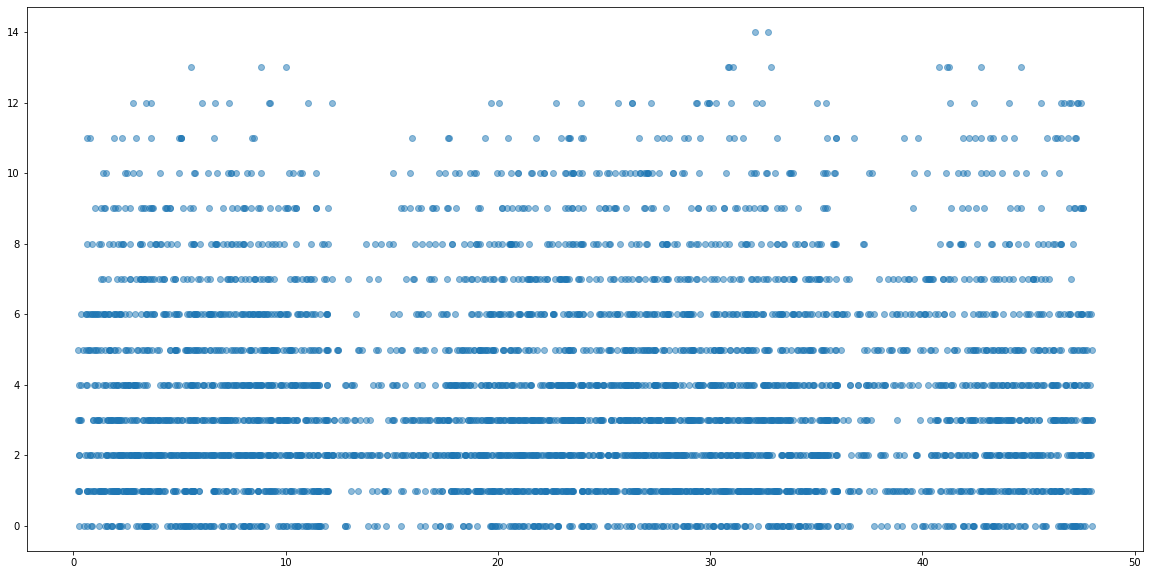

In [42]:
plt.subplots(figsize=(20,10))
plt.scatter(top_def_DF['game_time'],top_def_DF['cum_shot'],alpha = 0.5)

In [91]:
trial = top_def_DF[(top_def_DF['cum_shot'] > 9) & (top_def_DF['game_time'] < 1)]

In [107]:
top_def_DF[(top_def_DF['date'] == '2013-03-01') | (top_def_DF['date'] == '2013-02-26')]

,date,home,vs,quarter,time_left,shot_made,shot_value,shot_distance,cum_shot,game_time
878,2013-02-26,False,IND,1,1900-01-01 00:11:09,True,2,20,8.0,0.850000
879,2013-02-26,False,IND,1,1900-01-01 00:10:42,True,3,26,9.0,1.300000
880,2013-02-26,False,IND,1,1900-01-01 00:10:07,True,2,19,9.0,1.883333
881,2013-02-26,False,IND,1,1900-01-01 00:07:26,True,3,26,9.0,4.566667
882,2013-02-26,False,IND,2,1900-01-01 00:08:58,True,2,16,10.0,15.033333
883,2013-02-26,False,IND,2,1900-01-01 00:08:03,True,3,26,11.0,15.950000
884,2013-02-26,False,IND,2,1900-01-01 00:06:19,False,2,16,11.0,17.683333
885,2013-02-26,False,IND,2,1900-01-01 00:02:53,False,2,17,0.0,21.116667
886,2013-02-26,False,IND,2,1900-01-01 00:01:23,True,3,25,1.0,22.616667
887,2013-02-26,False,IND,2,1900-01-01 00:01:05,True,2,5,2.0,22.916667


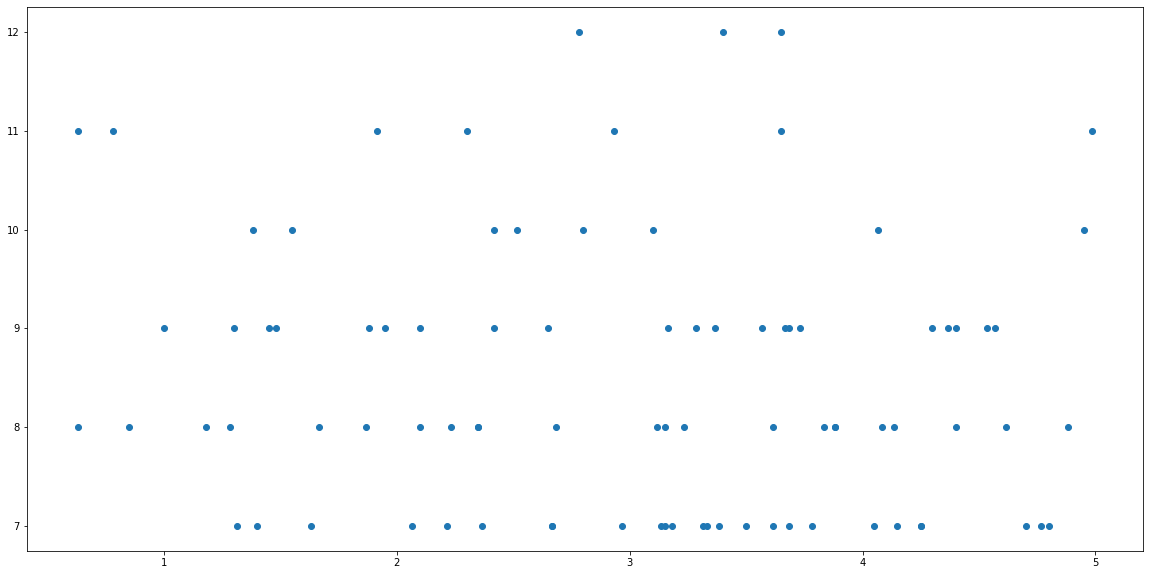

In [53]:
plt.subplots(figsize=(20,10))
plt.scatter(trial['game_time'], trial['cum_shot'])

In [73]:
#TRIAL AND ERROR FOR CUM_SHOT
test = df_all.groupby(df_all['date'])['shot_made'].cumsum()